# Top 100 Anime Series Exploratory Data Anlaysis 
### Kim Santos

# **Table of Contents**
* Introduction
* Setup
* Web Scraping
* Data Wrangling
* Exploratory Data Analysis
* Conclusion

# **Introduction**
This is an Exploratory Data Analysis project for the Top 100 Anime Series data set collected from https://myanimelist.net/.

The website was scraped in order to collect the information of: **titles, scores, genres, types, episodes, status, aired, premiered, broadcasts, producers, licensors, studios, sources, duration, rating, popularity, members, favorite and rank.**

## **Investigation**
This project will explore and analyze the attributes of Studios for how their animes made it to the Top 100 Anime Series. 

#### **Research Questions**
> **RQ1**: What type of anime does each Studio produce? <br /> 
> **RQ2**: How is the relationship between Scores and Members from the anime types? <br />
> **RQ3**: Which Studios have the most animes and highest score? <br /> 
> **RQ4**: How well does each studio score in the animes they produce? <br /> 
> **RQ5**: How well does each studio bring in members? <br /> 
> **RQ6**: Which genres have the highest score ratings and members? <br /> 
> **RQ7**: What is the frequency distribution of members of the top animes? <br /> 

---

# **Setup**

In [3]:
# This cell imports the necessary libraries and its packages in order to web scrape data, create data frames, mathematical operations and graphs.
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import matplotlib.pyplot as plt

import pandas as pd
from pandas import Series

import numpy as np

import seaborn as sns

# **Web Scraping**

In [2]:
# assigning 'driver' variable to get access to open Chrome; 'wait' variable is waiting an amount of time for code to load before moving on
driver = webdriver.Chrome('/Users/kimochi/Desktop/chromedriver')
wait = WebDriverWait(driver, 15)

In [4]:
# 'links' variable is set to be a list where the Top 100 Anime Series will be stored
# the for-loop goes into the link where the Top 100 Anime Series is stored; it will then go into each anime by their link and store it into the 'links' variable
links = []
for page in range (0, 100, 50):
    driver.get('https://myanimelist.net/topanime.php?limit=' + str(page))
    link = driver.find_elements(By.CSS_SELECTOR, 'div[class ="detail"] h3 a')
    for item in link:
        links.append(item.get_attribute('href'))

In [4]:
# assigning list variables
titles = [] 
scores = [] 
genres = []
anime_types = []
episodes = []
statuses = []
aired = []
premiered = []
broadcasts = []
producers = []
licensors = []
studios = []
sources = []
durations = []
ratings = []
popularity = []
members = []
favorites = []
ranks = []

In [5]:
# for loop will gain access to each anime link and will scrape all variables listed
for anime_link in links:
    driver.get(anime_link)
    
    title = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'div[class="h1-title"]'))).text
    score = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'div[class*="score-label"]'))).text
    genre = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Genre")]/parent::div'))).text
    anime_type = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'span[class="information type"]'))).text
    episode = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Episodes")]/parent::div'))).text
    status = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Status")]/parent::div'))).text
    air = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Air")]/parent::div'))).text

    try:
        premier = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Premiered")]/parent::div'))).text
    except:
        premier = None

    try:
        broadcast = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Broadcast")]/parent::div'))).text
    except:
        broadcast = None

    producer = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Producers")]/parent::div'))).text
    licensor = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Licensors")]/parent::div'))).text
    studio = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Studios")]/parent::div'))).text
    source = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Source")]/parent::div'))).text
    duration = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Duration")]/parent::div'))).text
    rating = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Rating")]/parent::div'))).text
    pop = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Popularity")]/parent::div'))).text
    member = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'span[class="numbers members"]'))).text
    favorite = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Favorites")]/parent::div'))).text
    rank = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'span[class*="numbers ranked"]'))).text
    
# following statements will remove uneccessary strings for each variable    
    genre = genre.replace("Genres: ", "")
    episode = episode.replace("Episodes: ", "")
    status = status.replace("Status: ", "")
    air = air.replace("Aired: ", "")     
    try:
        premier = premier.replace("Premiered: ", "")
    except:
        premier = None

    try:
        broadcast = broadcast.replace("Broadcast: ", "")
    except:
        broadcast = None    
    producer = producer.replace("Producers: ", "")
    licensor = licensor.replace("Licensors: ", "")
    studio = studio.replace("Studios: ", "")
    source = source.replace("Source: ", "")
    duration = duration.replace("Duration: ", "")
    rating = rating.replace("Rating: ", "")
    pop = pop.replace("Popularity: #", "")
    member = member.replace("Members ", "")
    favorite = favorite.replace("Favorites: ", "")
    rank = rank.replace("Ranked #", "")

# the data gathered is stored into a list from the list variables created before this cell
    titles.append(title)
    scores.append(score)
    genres.append(genre)
    anime_types.append(anime_type)
    episodes.append(episode)
    statuses.append(status)
    aired.append(air)
    premiered.append(premier)
    broadcasts.append(broadcast)
    producers.append(producer)
    licensors.append(licensor)
    studios.append(studio)
    sources.append(source)
    durations.append(duration)
    ratings.append(rating)
    popularity.append(pop)
    members.append(member)
    favorites.append(favorite)
    ranks.append(rank)

In [6]:
# creating a data frame; adding column names and assigning each column name with its corresponding list
my_data = {"Title": titles, "Score": scores, "Genres": genres, "Type": anime_types, "Episodes": episodes,
          "Status": statuses, "Aired": aired, "Premiered": premiered, "Broadcast": broadcasts, "Producers": producers,
          "Licensors": licensors, "Studios": studios, "Source": sources, "Duration": durations, 
          "Rating": ratings, "Popularity": popularity, "Members": members, "Favorites": favorites,
          "Ranked": ranks}

In [7]:
#data frame created
df = pd.DataFrame(data = my_data)

In [8]:
# saving dataframe into a .csv file
df.to_csv('MyAnimeListWebScraping.csv')
print('saved to file')

saved to file


In [9]:
driver.quit()

# **Data Wrangling**

This section will load the Top 100 Anime Series data that was scraped from the https://myanimelist.net/ site. An overview of the data is looked into in order to get a general idea of what was gathered. The data will be cleaned by updating, removing, trimming any variables or observations that will not partake in the research.

#### **What we will be wrangling**:
> 1. Remove variables not needed
> 2. From Type variable, remove strings: OVA, ONA, Special
> 3. From Episodes variable, remove string: Unkown
> 4. From Licensors variable, remove strings:  'None Found, add some', Notes
> 5. Remove commas from Members, Popularity and Favorites and set as int

In [18]:
# load the Top 100 Anime Series data from the desktop
mal = pd.read_csv('/Users/kimochi/Desktop/MyAnimeListWebScraping.csv')

In [19]:
# Use info() to see the overview of information from the dataframe
# Use head() to view first 5 rows
mal.info()
mal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   Title       100 non-null    object 
 2   Score       100 non-null    float64
 3   Genres      100 non-null    object 
 4   Type        100 non-null    object 
 5   Episodes    100 non-null    object 
 6   Status      100 non-null    object 
 7   Aired       100 non-null    object 
 8   Premiered   71 non-null     object 
 9   Broadcast   72 non-null     object 
 10  Producers   100 non-null    object 
 11  Licensors   100 non-null    object 
 12  Studios     100 non-null    object 
 13  Source      100 non-null    object 
 14  Duration    100 non-null    object 
 15  Rating      100 non-null    object 
 16  Popularity  100 non-null    int64  
 17  Members     100 non-null    object 
 18  Favorites   100 non-null    object 
 19  Ranked      100 non-null    in

,Unnamed: 0,Title,Score,Genres,Type,Episodes,Status,Aired,Premiered,Broadcast,Producers,Licensors,Studios,Source,Duration,Rating,Popularity,Members,Favorites,Ranked
0,0,Fullmetal Alchemist: Brotherhood,9.17,"Action, Military, Adventure, Comedy, Drama, Ma...",TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24 min. per ep.,R - 17+ (violence & profanity),3,"2,445,121","174,287",1
1,1,Shingeki no Kyojin Season 3 Part 2\nAttack on ...,9.11,"Action, Drama, Fantasy, Military, Mystery, Sho...",TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,23 min. per ep.,R - 17+ (violence & profanity),45,"1,340,086","38,873",2
2,2,Steins;Gate,9.10,"Sci-Fi, Psychological, Drama, Thriller",TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Movic, AT-X, Ka...",Funimation,White Fox,Visual novel,24 min. per ep.,PG-13 - Teens 13 or older,10,"1,925,702","148,699",3
3,3,Gintama¬∞\nGintama Season 4,9.09,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,24 min. per ep.,PG-13 - Teens 13 or older,336,"440,457","11,246",4
4,4,Hunter x Hunter (2011)\nHunter x Hunter,9.07,"Action, Adventure, Fantasy, Shounen, Super Power",TV,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,Sundays at 10:55 (JST),"VAP, Nippon Television Network, Shueisha",VIZ Media,Madhouse,Manga,23 min. per ep.,PG-13 - Teens 13 or older,11,"1,905,575","147,536",5


#### 1. Remove variables not needed

In [20]:
# use 'drop' function to remove the columns
mal.drop(['Status', 'Aired', 'Premiered', 'Broadcast', 'Producers', 'Source', 'Duration', 'Rating'], axis = 1, inplace = True)

#### 2. From Type variable, remove strings: OVA, ONA, Special
#### 3. From Episodes variable, remove string: Unkown
#### 4. From Licensors variable, remove strings: 'None Found, add some', Notes

In [21]:
# Dropping rows that contains certain string
mal = mal[~mal['Episodes'].str.contains('Unknown')]
mal = mal[~mal['Type'].str.contains('Special')]
mal = mal[~mal['Type'].str.contains('OVA')]
mal = mal[~mal['Type'].str.contains('ONA')]
mal = mal[~mal['Licensors'].str.contains('None found, add some')]

#### 5. Remove commas from Members, Popularity and Favorites and set as int

In [22]:
# Removing commas
mal['Episodes']=mal['Episodes'].str.replace(',','')
mal['Members']=mal['Members'].str.replace(',','')
mal['Favorites']=mal['Favorites'].str.replace(',','')

In [23]:
# Replacing data types
mal['Members'] = pd.to_numeric(mal['Members'])
mal['Episodes'] = pd.to_numeric(mal['Episodes'])
mal['Favorites'] = pd.to_numeric(mal['Favorites'])

In [24]:
# Check finished results
mal.info()
pd.options.display.max_columns = None
display(mal)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 99
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  69 non-null     int64  
 1   Title       69 non-null     object 
 2   Score       69 non-null     float64
 3   Genres      69 non-null     object 
 4   Type        69 non-null     object 
 5   Episodes    69 non-null     int64  
 6   Licensors   69 non-null     object 
 7   Studios     69 non-null     object 
 8   Popularity  69 non-null     int64  
 9   Members     69 non-null     int64  
 10  Favorites   69 non-null     int64  
 11  Ranked      69 non-null     int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 7.0+ KB


,Unnamed: 0,Title,Score,Genres,Type,Episodes,Licensors,Studios,Popularity,Members,Favorites,Ranked
0,0,Fullmetal Alchemist: Brotherhood,9.17,"Action, Military, Adventure, Comedy, Drama, Ma...",TV,64,"Funimation, Aniplex of America",Bones,3,2445121,174287,1
1,1,Shingeki no Kyojin Season 3 Part 2\nAttack on ...,9.11,"Action, Drama, Fantasy, Military, Mystery, Sho...",TV,10,Funimation,Wit Studio,45,1340086,38873,2
2,2,Steins;Gate,9.10,"Sci-Fi, Psychological, Drama, Thriller",TV,24,Funimation,White Fox,10,1925702,148699,3
3,3,Gintama¬∞\nGintama Season 4,9.09,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,"Funimation, Crunchyroll",Bandai Namco Pictures,336,440457,11246,4
4,4,Hunter x Hunter (2011)\nHunter x Hunter,9.07,"Action, Adventure, Fantasy, Shounen, Super Power",TV,148,VIZ Media,Madhouse,11,1905575,147536,5
...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,Uchuu Kyoudai\nSpace Brothers,8.52,"Comedy, Sci-Fi, Seinen, Slice of Life, Space",TV,99,Sentai Filmworks,A-1 Pictures,1019,157402,3325,95
95,95,Rainbow: Nisha Rokubou no Shichinin\nRainbow,8.51,"Drama, Historical, Seinen, Thriller",TV,26,Funimation,Madhouse,483,320539,7212,96
96,96,Steins;Gate 0,8.51,"Sci-Fi, Psychological, Drama, Thriller",TV,23,Funimation,White Fox,182,640070,8770,97
97,97,Aria the Origination,8.51,"Sci-Fi, Slice of Life, Fantasy, Shounen",TV,13,Nozomi Entertainment,Hal Film Maker,1464,102095,3540,98


# **Exploratory Data Analysis**

This section looks into exploring the data and answering the research questions we encountered in the beginning of the project.

#### **Observing the data**

In [25]:
# descriptive statistics
mal.describe()

,Unnamed: 0,Score,Episodes,Popularity,Members,Favorites,Ranked
count,69.000000,69.000000,69.000000,69.000000,6.900000e+01,69.000000,69.000000
mean,48.855072,8.717826,23.536232,343.159420,8.077930e+05,28133.550725,49.855072
std,29.108456,0.173543,34.346667,354.044473,6.379629e+05,37241.177293,29.108456
min,0.000000,8.510000,1.000000,1.000000,1.020950e+05,452.000000,1.000000
25%,25.000000,8.590000,1.000000,57.000000,2.563210e+05,4111.000000,26.000000
50%,47.000000,8.690000,13.000000,192.000000,6.307420e+05,14296.000000,48.000000
75%,72.000000,8.810000,26.000000,613.000000,1.189167e+06,37275.000000,73.000000
max,99.000000,9.170000,201.000000,1464.000000,2.858666e+06,174287.000000,100.000000


This table describes an overall descriptive statistics between variables of the 'int' data type. This provides the mean, standard deviation, minimum, maximum, and the 25th and 75th percentile. We can ignore the 'Unnamed: 0' column.

We can first focus on the overall average of variables listed: 8.7 score, 23.5 episodes, 8 million members, 343 popularity, 28,000 favorites, and 49 rank. Keep in mind of the context when interpreting the averages of these variables. It does not make much sense when finding the average scores of Popularity, Favorites and Ranked. These variables are originally meant to display where anime shows were placed, and it is not necessary to know their averages. As for the variables of Score, Episodes, and Members, it makes more sense when interpreting their averages. We can see how well scored anime shows are, what the usual amound of episodes are being distributed and around, on average, overall members there are.

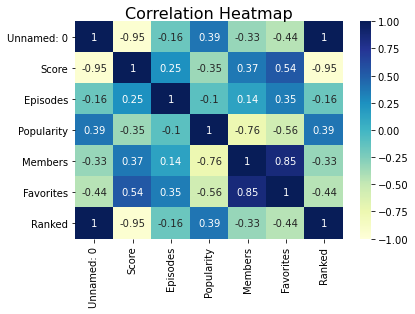

In [26]:
#correlation between variables
mal_corr = sns.heatmap(mal.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
mal_corr.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=1);

The heatmap shows how variables of the 'int' data type have either a high or low relationship between each other. It is important to note that the "Unnamed" variable should not be taken into account since the variable only counts with how many anime are listed.

We are able to see variables who are in relationship to eachother have the highest correlation of 1- which is in the darkest blue color. Relationships between other variables show different gradient colors from darkest to lightest. Meaning, the relationship between two variables start have less dependency on each other when it gets further away from 1, and its color gets lighter. The variables that have the lowest relationship with each other is Rank vs Score and the one with the highest, aside of the relation to their same variable, is Favorites vs Members

#### **RQ1**: What type of anime does each Studio produce?

In [27]:
# split the 'Genres' variable to separate and group data by genre
# remove original 'Genres' variable and replace it with 'genre_split'
gs = mal['Genres'].str.split(', ').apply(Series, 1).stack()
gs.index = gs.index.droplevel(-1)
gs.name = 'Genres'
del mal['Genres']
genre_split = mal.join(gs)

In [28]:
# gather which 'type' of anime each studio produces
studio_type = mal.groupby('Studios')['Type'].unique()
studio_type

Studios
A-1 Pictures                                    [TV]
Artland                                         [TV]
Bandai Namco Pictures                           [TV]
Bones                                           [TV]
Brain's Base                                    [TV]
CloverWorks                              [Movie, TV]
CoMix Wave Films                             [Movie]
David Production                                [TV]
Gainax                                   [TV, Movie]
Gainax, Production I.G                       [Movie]
Hal Film Maker                                  [TV]
Kinema Citrus                            [TV, Movie]
Kyoto Animation                          [Movie, TV]
Lerche                                          [TV]
Licensors: Walt Disney Studios               [Movie]
Licensors: Walt Disney Studios, GKIDS        [Movie]
MAPPA                                           [TV]
Madhouse                                        [TV]
Production I.G                        

**RQ1**: Analysis <br />
There are studios who specifically make anime for television or as a movie while other studios has done both.

#### **RQ2**: How is the relationship between Scores and Members from the anime types?

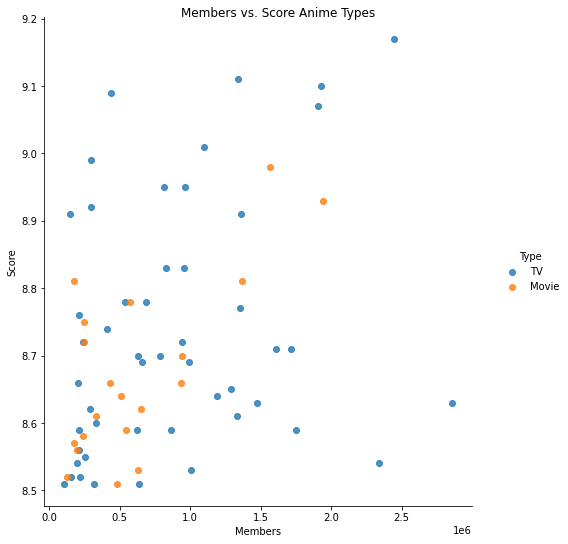

In [29]:
# create scatter plot for variables Score and Members
sns.lmplot( x = 'Members', y ='Score', data=mal, hue='Type', fit_reg=False );
s_type = plt.gcf()
s_type.set_size_inches(8, 8);
plt.suptitle("Members vs. Score Anime Types");
plt.show()

**RQ2**: Analysis <br />
The relationship of Scores and Members between the Anime Movie type apears to have a positive correlation while there is no correlation with the TV type.

#### **RQ3**: Which Studios have the most animes and highest score ratings?

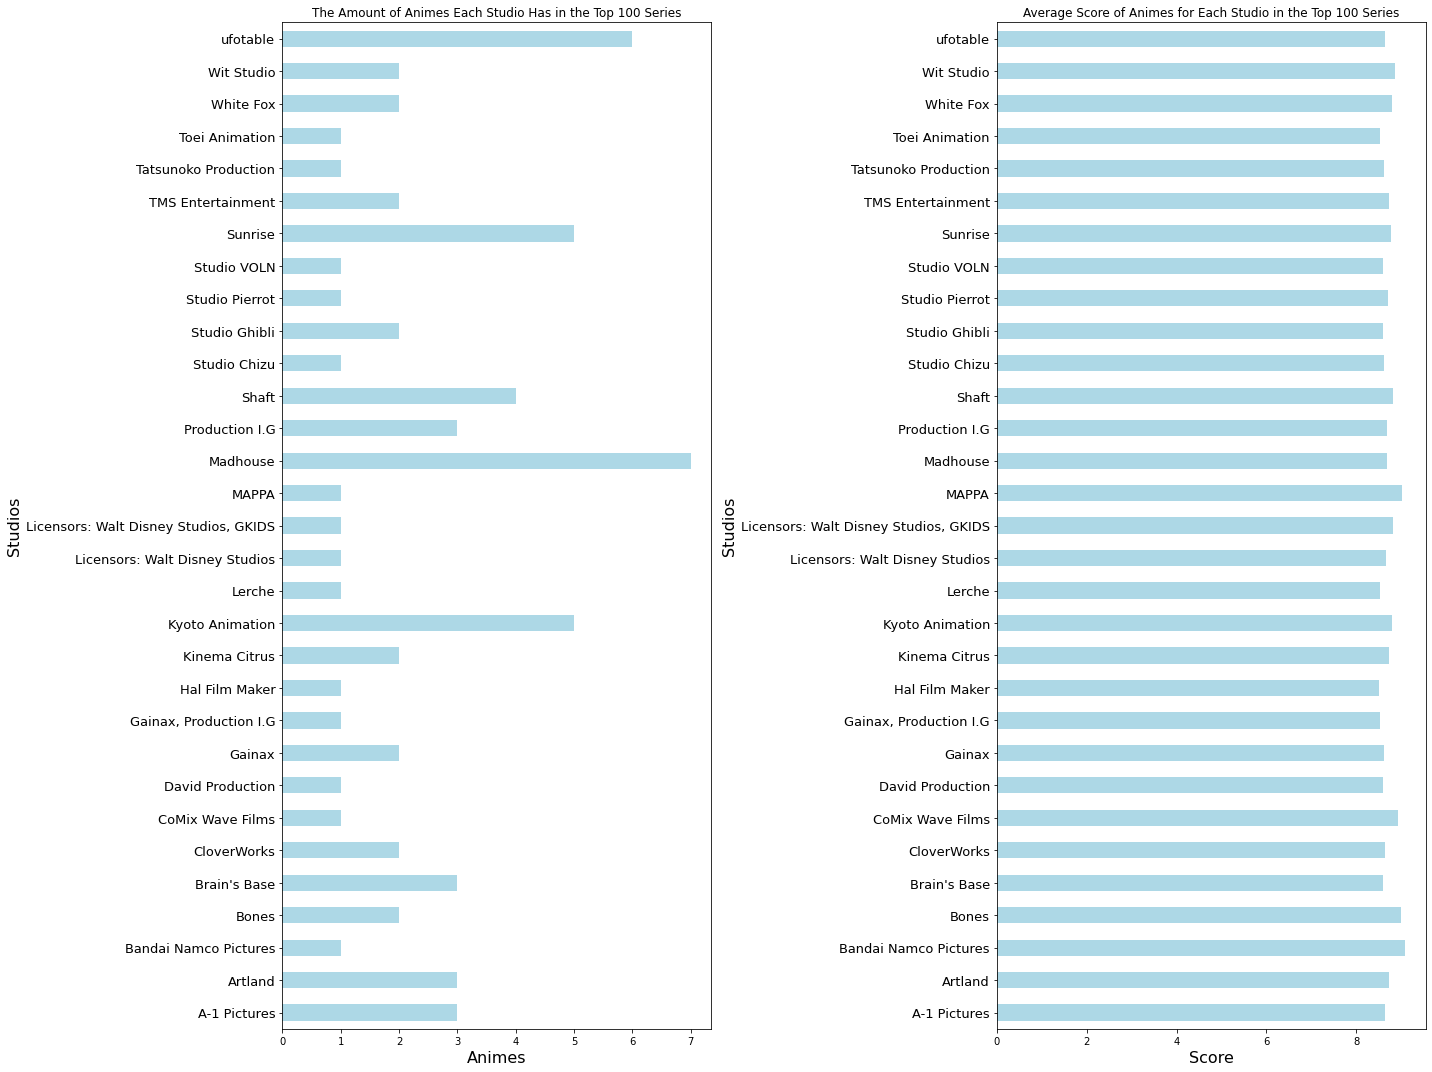

In [30]:
# plot for studios most animes
plt.subplot(1,2,1)
studios_anime = mal.groupby(['Studios'])['Title'].count()
studios_anime.plot.barh(title = 'The Amount of Animes Each Studio Has in the Top 100 Series', color='LightBlue', figsize=(20, 15))
plt.xlabel("Animes", size = 16)
plt.ylabel("Studios", size = 16)
plt.yticks(size = 13)

# plot for studios average score ratings
plt.subplot(1,2,2)
studios_score = mal.groupby(['Studios'])['Score'].mean()
studios_score.plot.barh(title = 'Average Score of Animes for Each Studio in the Top 100 Series',color='LightBlue', figsize=(20, 15));
plt.xlabel("Score", size = 16)
plt.ylabel("Studios", size = 16)
plt.yticks(size = 13)

plt.tight_layout()
plt.show()

**RQ3**: Analysis <br />
The two bar graphs show how many animes each studio produced for the Top 100 Anime Series and comparing their average Scores with other studios. Majority of the studios produced 3 animes or less while just a few produced around 4-7. Overall, their average scores were all above an 8.

#### **RQ4**: How well does each studio score in the animes they produce?

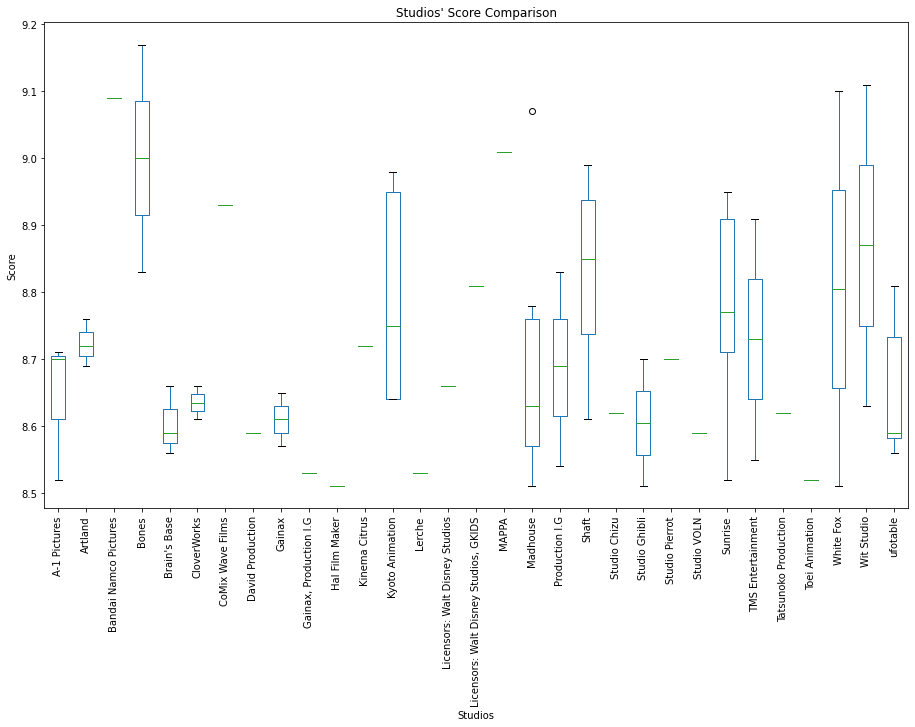

In [31]:
#create boxplots and comparing the studios scores side by side
mal.boxplot(by ='Studios', column =['Score'], grid = False,  figsize=(15, 9));
plt.title("Studios' Score Comparison")
plt.suptitle("")
plt.xticks(rotation = 90);
plt.ylabel('Score')
plt.show();

**RQ4**: Analysis <br />
The boxplots shows a visualization that helps compare Studios' scores between each other. We see a distribution on the maximum and minimum scores studios receive, as well the median and what 25th and 75th percentile they lay on. Some studios only receive a single line as they only produced one anime, which can only be read as one score. 

The Scores of Studios' appear to have symmetrical normal and positive distributions- with the exception of one negative distribution. We may interpret the symmetrical distributions have scores normally distributed close to their average scores, and the positive distributions are closer to the 25th percentile.

#### **RQ5**: How well does each studio bring in members?

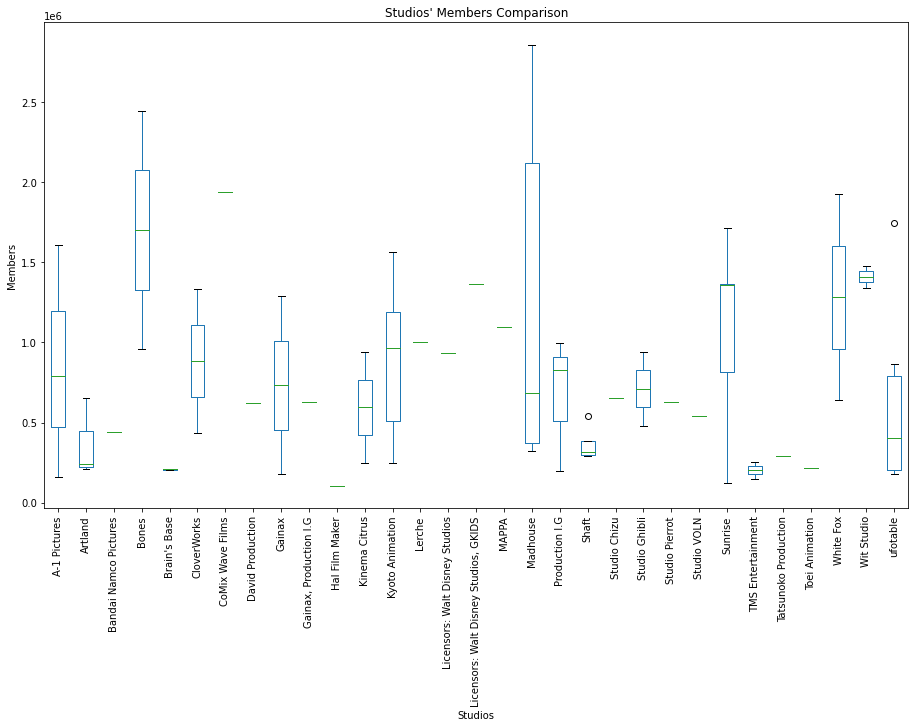

In [32]:
mal.boxplot(by ='Studios', column =['Members'], grid = False,  figsize=(15, 9));
plt.title("Studios' Members Comparison")
plt.suptitle("")
plt.xticks(rotation = 90);
plt.ylabel('Members')
plt.show()

**RQ5**: Analysis <br />
The boxplot displays a comparison on how each studio does when receiving members for the animes they produced. Since some studios only produced one anime that made it to the Top 100 Anime Series, they only received one data value regarding how many members are in the studios' only single anime.

Some boxplots members appear to have a symmetrical distributions where data shows the members are close to the studios' average, however, we also see data that falls closer to the 25th or 75th percentile. This gives us interpretations how members are distributed based on the anime studios produce.

#### **RQ6**: Which genres have the highest score ratings and members?

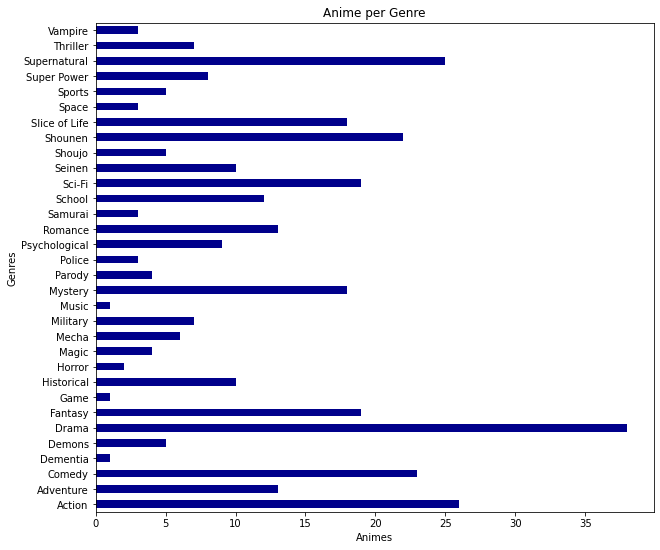

In [33]:
# counting how many animes contain a certain genre
genre_count = genre_split.groupby('Genres').count()

genre_count.plot.barh(title = 'Anime per Genre',color='DarkBlue', figsize=(10, 9))
ax = plt.gca()
ax.set_xlabel("Animes")
ax.set_ylabel("Genres")
ax.get_legend().remove()

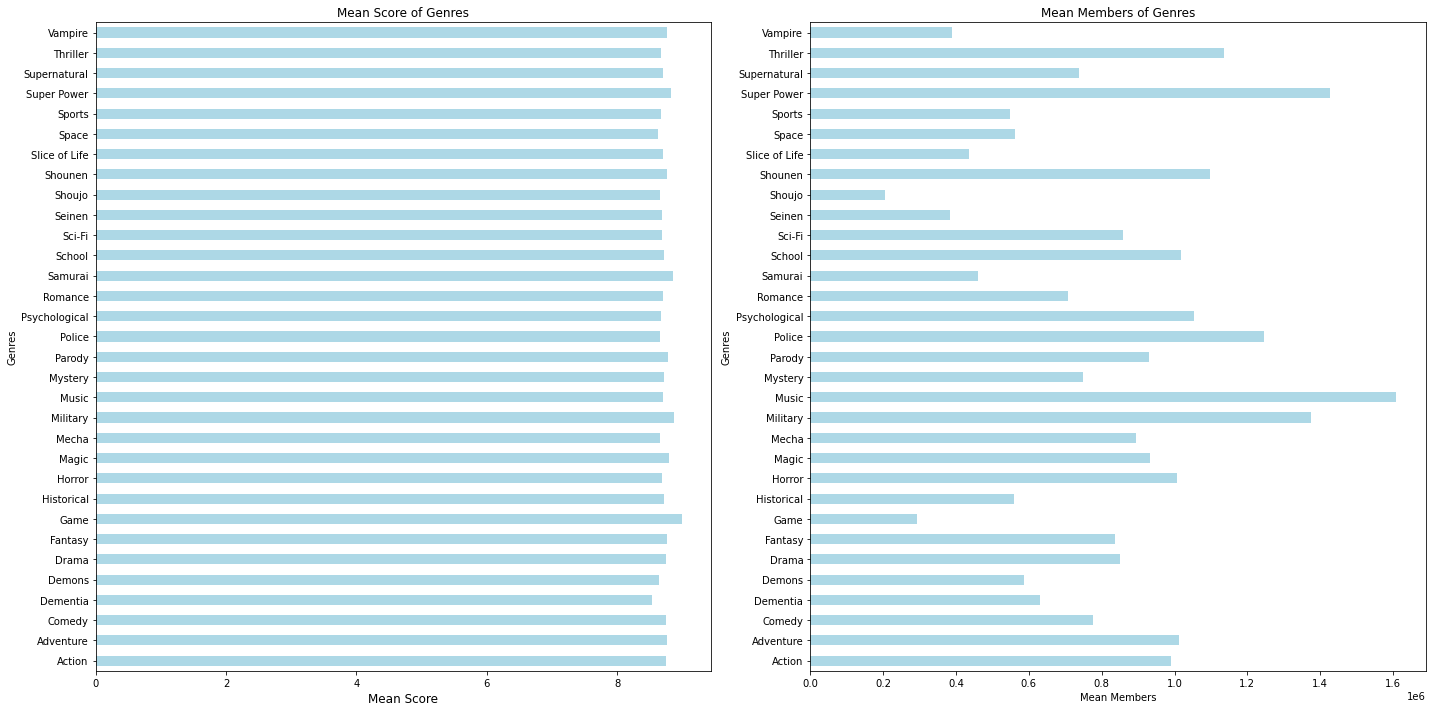

In [34]:
# plot of mean score of each genre
plt.subplot(1,2,1)
genre_mean_score = genre_split.groupby('Genres')['Score'].mean()
genre_mean_score.plot.barh(title = 'Mean Score of Genres',color='LightBlue', figsize=(20, 10))
plt.xlabel("Mean Score", size = 12)
plt.ylabel("Genres")

#plot of mean members of each genre
plt.subplot(1,2,2)
genre_mean_members = genre_split.groupby('Genres')['Members'].mean()
genre_mean_members.plot.barh(title = 'Mean Members of Genres',color='LightBlue', figsize=(20, 10))
plt.xlabel("Mean Members")

plt.tight_layout()
plt.show()

**RQ6**: Analysis <br />
The bar plots show the average between scores and members of each genres. We are able to see how many members would watch an anime with a specific genre and how the rating would be in the Top 100 Anime Series.

All the genres were able to score an average above 8 so far. However, looking into how many members are in each genre by average, we can see what preference members may lean towards more. For example, members appear to watch 'Military' and 'Super Power' the most while 'Shouju' and 'Game' the least.

#### **RQ7**: What is the frequency distribution of members of the top animes?

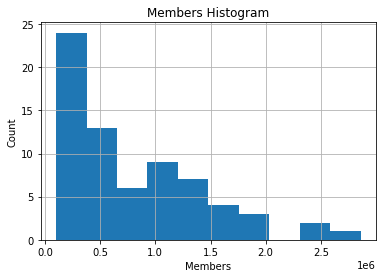

In [41]:
mal.hist('Members')
plt.title("Members Histogram")
plt.ylabel("Count")
plt.xlabel("Members")
plt.show()

**RQ7**: Analysis <br />
The histogram shows how many members are distributed across each anime. The histogram is skewed to the right where there is more frequency being distributed. Meaning, there are more 500,000 or less members who join animes while a million or more is less seen across.

# **Conclusion**

The Exploratory Data Analysis took a look into Studios and how their animes made it into the Top 100 Anime Series.

There are studios who specifically make anime for television series or as a movie while other studios has done both. It was seen there was positive correlation between members and scores for movies, however, no correlation for televisions. The comparison between scores were based on studios who majority produced around 3 animes while others produced lower or around 4-7. Their distribution varied between being symmetrical or positively skewed. The comparison between members had a variety of distributions in regards to being symmetrical, positively and negatively skewed.

The view of member frequency across each anime was skewed to the right. This is where we saw 500,000 or less members are frequently seen to join animes while a million or more members was less seen distributed.

Each genre had an average of how many members are have seen that specific genre, and it was seen 'Military' and 'Super Power' was the most watched while 'Shouju' and 'Game' was the least.